In [6]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error,r2_score



In [7]:
X,y=load_diabetes(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
ridge=Ridge()

In [8]:
params ={'alpha':np.logspace(-3,3,7)}
grid_ridge=GridSearchCV(ridge,param_grid=params,cv=5,scoring='r2')
grid_ridge.fit(X_train,y_train)

,estimator,Ridge()
,param_grid,"{'alpha': array([1.e-03...e+02, 1.e+03])}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,np.float64(0.1)


In [9]:
best_ridge=grid_ridge.best_estimator_
y_pred=best_ridge.predict(X_test)

In [10]:
print("Best Alpha (Ridge):", grid_ridge.best_params_)
print("R2 Score (Ridge):", r2_score(y_test, y_pred))
print("MSE (Ridge):", mean_squared_error(y_test, y_pred))

Best Alpha (Ridge): {'alpha': np.float64(0.1)}
R2 Score (Ridge): 0.46085219464119254
MSE (Ridge): 2856.486887670654


In [11]:
from sklearn.linear_model import Lasso
lasso=Lasso()   
params = {"alpha": np.logspace(-3, 3, 7)}   # alpha range same as Ridge
grid_lasso = GridSearchCV(lasso, param_grid=params, cv=5, scoring='r2')
grid_lasso.fit(X_train, y_train)


,estimator,Lasso()
,param_grid,"{'alpha': array([1.e-03...e+02, 1.e+03])}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,np.float64(0.1)


In [12]:
best_lasso = grid_lasso.best_estimator_
y_pred = best_lasso.predict(X_test)


In [13]:

print("Best Alpha (Lasso):", grid_lasso.best_params_)
print("R2 Score (Lasso):", r2_score(y_test, y_pred))
print("MSE (Lasso):", mean_squared_error(y_test, y_pred))
print("Number of Non-Zero Coefficients:", np.sum(best_lasso.coef_ != 0))

Best Alpha (Lasso): {'alpha': np.float64(0.1)}
R2 Score (Lasso): 0.4718547867276227
MSE (Lasso): 2798.193485169719
Number of Non-Zero Coefficients: 7


In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [15]:
lin = LinearRegression().fit(X_train, y_train)
ridge = Ridge(alpha=grid_ridge.best_params_['alpha']).fit(X_train, y_train)
lasso = Lasso(alpha=grid_lasso.best_params_['alpha'], max_iter=10000).fit(X_train, y_train)


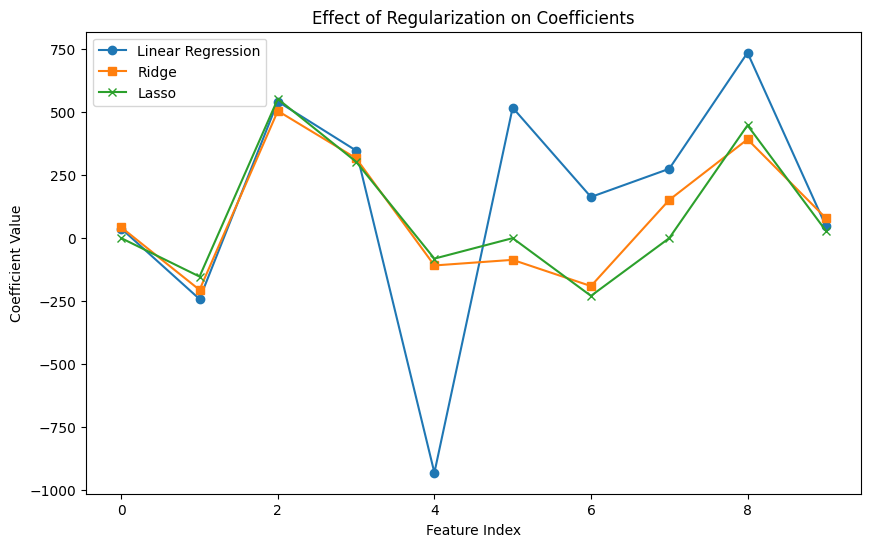

In [16]:
plt.figure(figsize=(10,6))
plt.plot(lin.coef_, 'o-', label="Linear Regression")
plt.plot(ridge.coef_, 's-', label="Ridge")
plt.plot(lasso.coef_, 'x-', label="Lasso")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Effect of Regularization on Coefficients")
plt.legend()
plt.show()